In [1]:
username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include(pathtorepo * "dynamical-systems\\system.jl");

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems
using CairoMakie, GLMakie

In [222]:
"""
sE - 1
sI - 2
rE -3
rI - 4
Y - 5
"""
# τsE - 1, γE - 2, s0E - 3, τsI - 4, γI - 5, s0I - 6, τrE - 7, kE - 8, IE - 9,
# wEE - 10, wIE - 11, θE - 12, τrI - 13, kI - 14, II - 15,
# wEI - 16, wII - 17, θI - 18, τY - 19, βY - 20, γY - 21, ythr - 22, sEthr - 23, kY - 24

"sE - 1\nsI - 2\nrE -3\nrI - 4\nY - 5\n"

In [41]:
integ_set = (alg = Vern9(), adaptive = false, dt = 0.001);

τsE = 3.0; γE = 2.0; s0E = 0.15;
τsI = 10.0; γI = 8.0; s0I = 0.1;

τrE = 2.0; kE = 5.0; IE = 0.9; wEE = 3.5; wIE = 5.0; θE = 0.2;
τrI = 6.0; kI = 5.0; II = 0.1; wEI = 5.0; wII = 3.0; θI = 0.4;

τY = 10.0;  βY = 1.0;
ythr = 0.5; sEthr = 0.5; kY = 0.01;
γY = 2.0;

p = [τsE, γE, s0E, τsI, γI, s0I, τrE, kE, IE, wEE, wIE, θE, τrI, kI, II, wEI, wII, θI, τY, βY, γY, ythr, sEthr, kY];
u0 = [0.0, 0.0, 0.0, 0.0, 0.0];

ds = CoupledODEs(rate_model, u0, p, diffeq = integ_set);

t = 1000;
ttr = 500;

In [42]:
p = [τsE, γE, s0E, τsI, γI, s0I, τrE, kE, IE, wEE, wIE, θE, τrI, kI, II, wEI, wII, θI, τY, βY, γY, ythr, sEthr, kY];
u0 = [0.0, 0.0, 0.0, 0.0, 0.0]

ds = CoupledODEs(rate_model, u0, p, diffeq = integ_set)
tr, trange = trajectory(ds, t, Δt = integ_set.dt)

(5-dimensional StateSpaceSet{Float64} with 1000001 points, 0.0:0.001:1000.0)

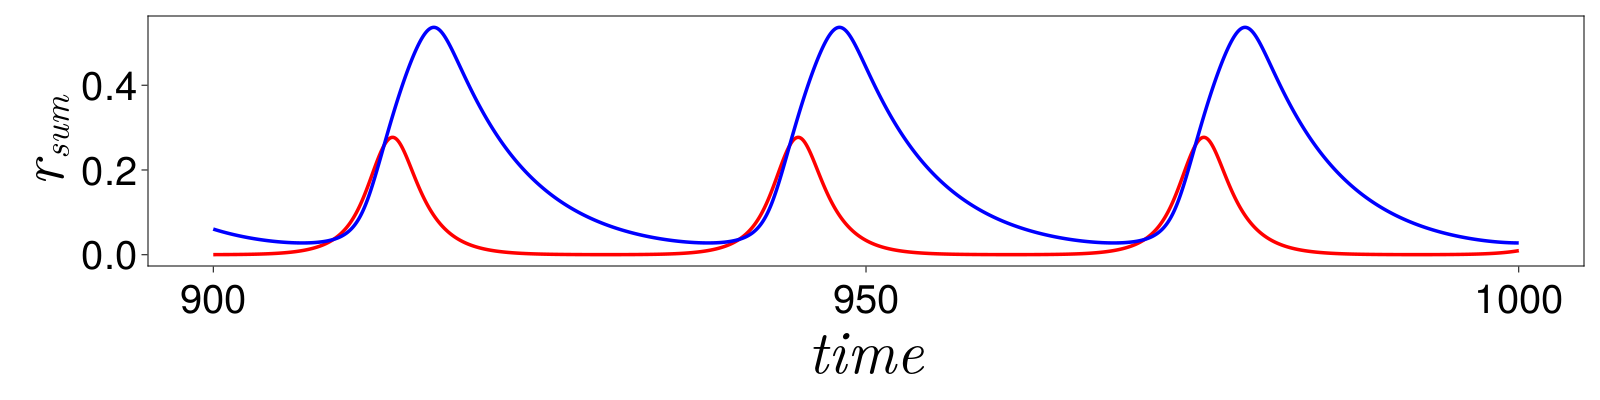

CairoMakie.Screen{IMAGE}


In [44]:
tstart, tend = 900000, 1000000
tickssize = 40
labelsize = 60
lw = 3.5
CairoMakie.activate!()
f= Figure(resolution = (1600, 400))
axisrHz  = Axis(f[1, 1], xlabel = L"time", ylabel = L"r_{sum}",
xlabelsize = labelsize, ylabelsize = labelsize,
xticklabelsize = tickssize, yticklabelsize = tickssize,
xgridvisible = false, ygridvisible = false)
#, title = "point C", titlesize = 40, titlecolor = :deeppink)

lines!(axisrHz, trange[tstart:tend], tr[tstart:tend, 3], linewidth = lw, color = :red)
lines!(axisrHz, trange[tstart:tend], tr[tstart:tend, 4], linewidth = lw, color = :blue)

display(f)

In [45]:
tstart, tend = 900000, 1000000
indexx, indexy, indexz = 3, 4, 1

lw = 1.0
linecolor = :purple
width = 600
height = 600
xl = "rE"
yl = "rI"
zl = "sE"
f = Figure(resolution = (width, height))
ax3 = Axis3(f[1, 1],  xlabel = xl, ylabel = yl, zlabel = zl)
#scale!(ax3.scene, 1, 1, 1)
lines!(ax3, tr[tstart:tend, indexx,], tr[tstart:tend, indexy], tr[tstart:tend,indexz], linewidth = lw, color = linecolor)
display(GLMakie.Screen(), f)

GLMakie.Screen(...)

In [46]:
tstart, tend = 900000, 1000000
indexx, indexy, indexz = 3, 4, 1

lw = 1.0
linecolor = :purple
width = 600
height = 600

f = Figure(resolution = (width, height))
ax3 = LScene(f[1, 1], show_axis = true)
scale!(ax3.scene, 1, 1, 1)
lines!(ax3, tr[tstart:tend, indexx,], tr[tstart:tend, indexy], tr[tstart:tend,indexz], linewidth = lw, color = linecolor)
display(GLMakie.Screen(), f)

GLMakie.Screen(...)